In [1]:
try
    load('ooinet.credentials.mat')  % returns a variable called options
catch
    error(['Unable to load access credentials. Users need to create a ' ...
           'weboptions object with their personal OOINet API keys. See ' ...
           'README for more information on how to create this.'])
end

In [2]:
start_date='2018-01-01T00:00:00.000Z';
end_date='2018-06-30T23:59:59.000Z';

In [3]:
platform_name = 'GP02HYPM';
node = 'PROFILER-U';
instrument_class = 'CTD';
method = 'RecoveredWFP';

In [4]:
[uframe_dataset_name,variables] = M2M_URLs(platform_name,node,instrument_class,method);

In [5]:
uframe_dataset_name

uframe_dataset_name = "GP02HYPM/WFP02/04-CTDPFL000/recovered_wfp/ctdpf_ckl_wfp_instrument_recovered"

In [6]:
variables

variables = 1x6 struct array with fields:
    name
    data
    units

In [7]:
[nclist] = M2M_Call(uframe_dataset_name,start_date,end_date,options);

M2M REQUEST MADE, not yet completed:
10 20 30 40 50 60 70 80 done
uframe_m2m_status: request complete
uframe_m2m_status: successful
THREDDS Catalog URL:
https://opendap.oceanobservatories.org/thredds/catalog/ooi/joffrey.peters@whoi.edu/20250513T140637753Z-GP02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html
 


In [8]:
%[ctd_variables_upper_wfp, ctd_mtime_upper_wfp, netcdfFilenames] = M2M_Data(variables, nclist, false);   %This will download .nc file(s) and read in the data from the local files
[ctd_variables_upper_wfp, ctd_mtime_upper_wfp, ~] = M2M_Data(variables, nclist);  %This will use the opendap to read in the data from remote files

In [9]:
platform_name = 'GP02HYPM';
node = 'PROFILER-L';
instrument_class = 'CTD';
method = 'RecoveredWFP';

In [10]:
[uframe_dataset_name,variables] = M2M_URLs(platform_name,node,instrument_class,method);

In [11]:
[nclist] = M2M_Call(uframe_dataset_name,start_date,end_date,options);

M2M REQUEST MADE, not yet completed:
10 20 30 40 50 60 70 80 done
uframe_m2m_status: request complete
uframe_m2m_status: successful
THREDDS Catalog URL:
https://opendap.oceanobservatories.org/thredds/catalog/ooi/joffrey.peters@whoi.edu/20250513T140812148Z-GP02HYPM-WFP03-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html
 


In [12]:
%[ctd_variables_lower_wfp, ctd_mtime_lower_wfp, netcdfFilenames] = M2M_Data(variables, nclist, false);   %This will download .nc file(s) and read in the data from the local files
[ctd_variables_lower_wfp, ctd_mtime_lower_wfp, ~] = M2M_Data(variables, nclist);  %This will use the opendap to read in the data from remote files

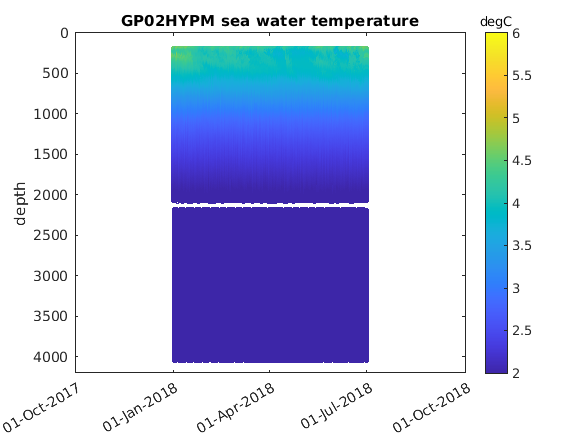

In [13]:
figure
scatter(ctd_mtime_upper_wfp,ctd_variables_upper_wfp(5).data,5,ctd_variables_upper_wfp(2).data)
set(gca, 'YDir','reverse')
ylabel('depth')
ylim([0 4200])
hold on
scatter(ctd_mtime_lower_wfp,ctd_variables_lower_wfp(5).data,5,ctd_variables_lower_wfp(2).data)
caxis([2 6])
c=colorbar;
title(c,ctd_variables_lower_wfp(2).units)
datetick('x',1)
title([platform_name ' ' strrep(ctd_variables_lower_wfp(2).name,'_',' ')])
box on